# DSW 08/03/2018 : Pokemon Data Set 

Cool database of all pokemon cards and their attributes !

**Importing Modules**

In [4]:
%matplotlib inline
import pandas as pd    # Used for data analysis
import matplotlib.pyplot as plt    # Used for assisting visualizations
import seaborn as sns    # Main visualization library

sns.set(style = 'darkgrid', color_codes = True) # My personal style preferences

# This is used as a hack in Jupyter Notebook to make seabron plots bigger. Call before making a plot.
def setplt():
    f, ax = plt.subplots(figsize=(15, 9))
    sns.despine(f, left=True, bottom=True)

**Reading in the CSV** (Make sure you have a link to csv or the csv is in your directory)

In [5]:
poke_data = pd.read_csv('Pokemon.csv') # This should work since Pokemon.csv is in the same directory as this file
poke_data.head(30) # Print out the first few lines of data to make sure it's working

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### Ask yourself some questions about the data

What are the different types of pokemon?

In [64]:
poke_data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

What is the disbtribution of each type of pokemon? Lets **see** this.

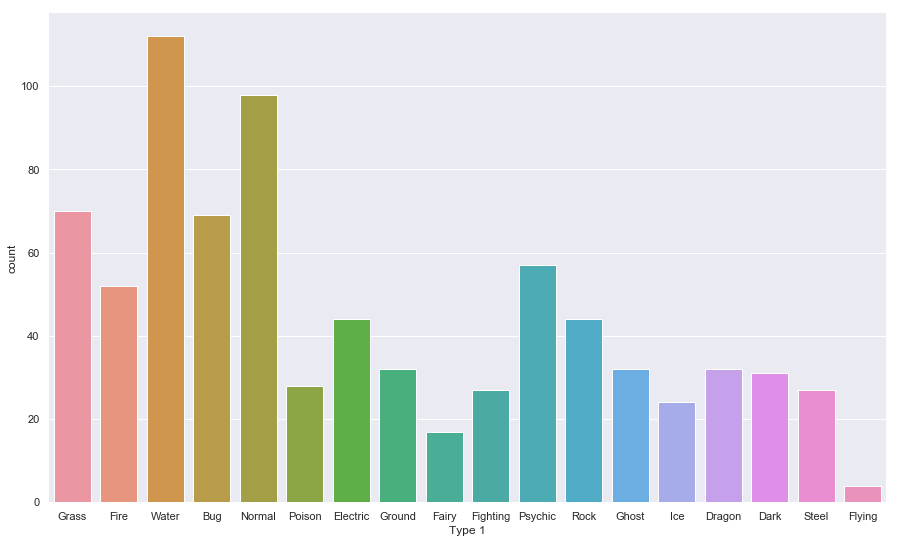

In [65]:
# Here we use a countplot in seaborn.
setplt() # Call this function before plotting in seaborn
countplt = sns.countplot(x = 'Type 1', data = poke_data)

Lets see some statistics in a more whole sense.

In [66]:
poke_data.describe().round()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,363.0,435.0,69.0,79.0,74.0,73.0,72.0,68.0,3.0
std,208.0,120.0,26.0,32.0,31.0,33.0,28.0,29.0,2.0
min,1.0,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0
25%,185.0,330.0,50.0,55.0,50.0,50.0,50.0,45.0,2.0
50%,364.0,450.0,65.0,75.0,70.0,65.0,70.0,65.0,3.0
75%,539.0,515.0,80.0,100.0,90.0,95.0,90.0,90.0,5.0
max,721.0,780.0,255.0,190.0,230.0,194.0,230.0,180.0,6.0


Lets visualize this.

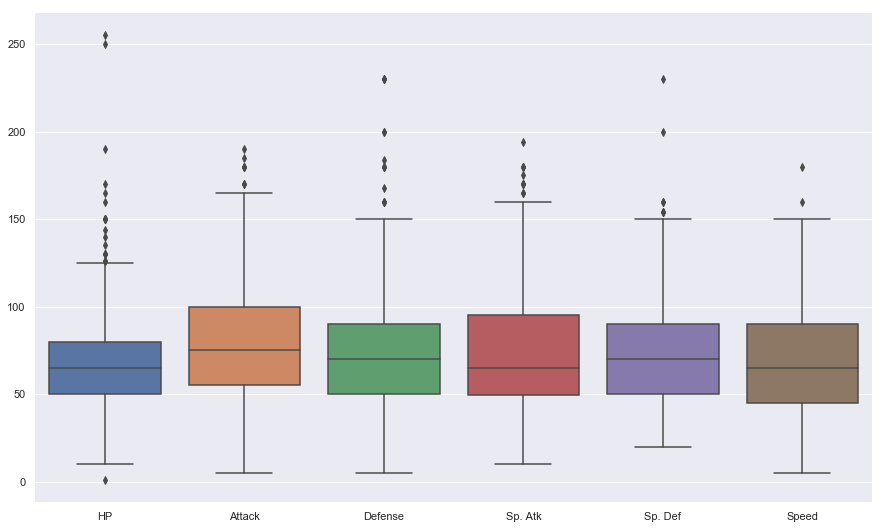

In [67]:
setplt()
useful_data = poke_data.drop(["Generation", "Legendary","Total", "#"],1) # These are kinda useless aren't they?
sns.boxplot(data = useful_data)

Does a Pokemon's Attack have any relationship to its Defense? Does the type of pokemon matter at all? 

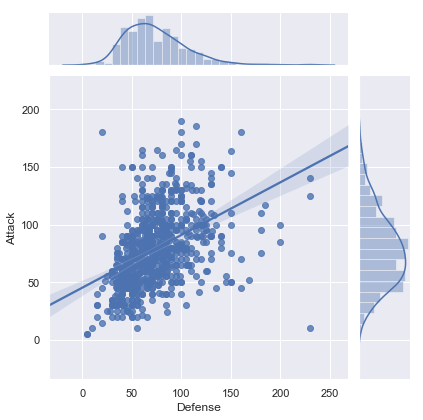

In [68]:
jntplt = sns.jointplot(x = 'Defense', y = 'Attack', data = poke_data, kind = "reg")

Is there a relationship between HP and Attack abilities. Does it matter if they are legendary?

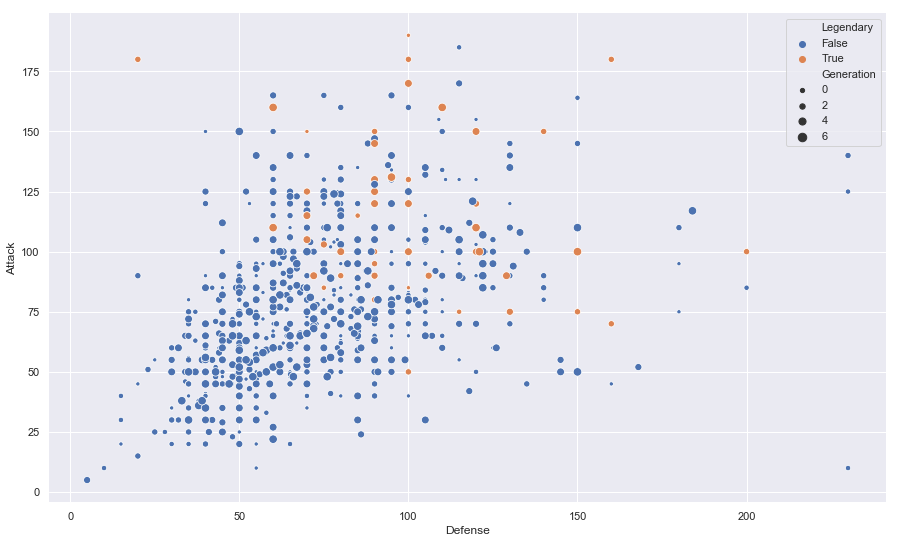

In [69]:
setplt()
scatplt = sns.scatterplot(x = 'Defense', y = 'Attack',hue = "Legendary", data = poke_data, size = "Generation" )

Lets look at the distribution of HP

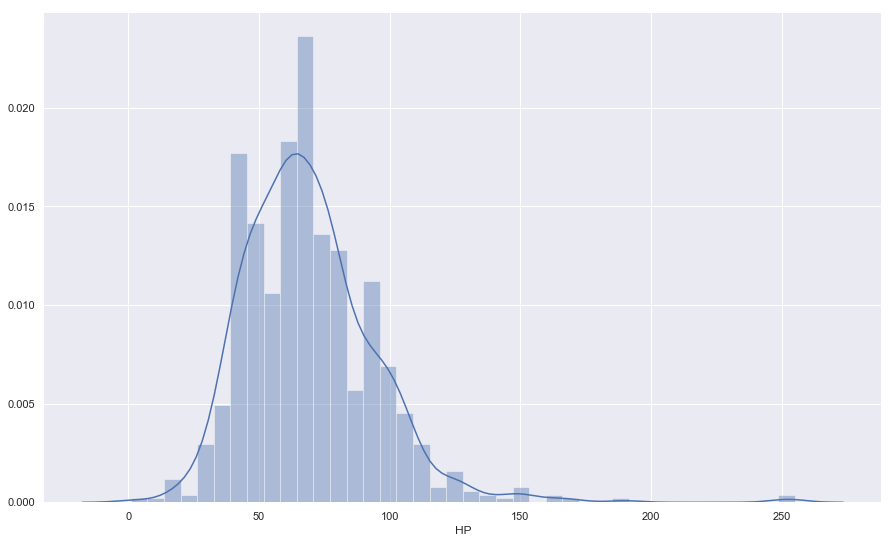

In [70]:
setplt()
distplt = sns.distplot(poke_data['HP'])

Lets make a subset of the data for only Legendary pokemon

In [71]:
legendary = poke_data[poke_data['Legendary'] == True]
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Any difference in Attack and Defense overall?

In [72]:
print("Attack:")
print(legendary['Attack'].mean())
print(poke_data['Attack'].mean())
print("\nDefense:")
print(legendary['Defense'].mean())
print(poke_data['Defense'].mean())

Attack:
116.67692307692307
79.00125

Defense:
99.66153846153846
73.8425


Now to the question that everyone is asking...   
### Groudon vs. Kyogre

In [73]:
Groudon = useful_data[useful_data["Name"] == "Groudon"]
Kyogre = useful_data[useful_data["Name"] == "Kyogre"]

Lets see the info for Groudon and Kyogre

In [74]:
print(Groudon) 
print("\n")
print(Kyogre)

        Name  Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
423  Groudon  Ground    NaN  100     150      140      100       90     90


       Name Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
421  Kyogre  Water    NaN  100     100       90      150      140     90


In [75]:
import numpy as np
labels = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])  # We just need to look at these

groudon = useful_data.loc[423,labels].values      # Collecting the data for groudon using numpy for format it
groudon = np.concatenate((groudon, [groudon[0]]))

kyogre = useful_data.loc[421,labels].values
kyogre = np.concatenate((kyogre, [kyogre[0]]))    # Collecting the data for kyogre using numpy for format it

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)  # Creating set points for angles given labels
angles = np.concatenate((angles, [angles[0]]))


Lets make a Radar Plot

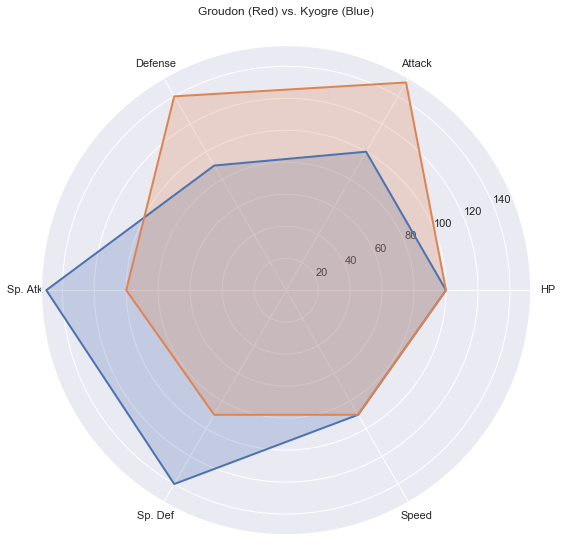

In [76]:
# Creating figure
fig = plt.figure(figsize = (9,9))
rplt = fig.add_subplot(111, polar = True)

# Adding kyogre
rplt.plot(angles, kyogre, linewidth = 2)
rplt.fill(angles, kyogre, alpha = 0.25)

# Adding Groudon
rplt.plot(angles, groudon, linewidth = 2)
rplt.fill(angles, groudon, alpha = 0.25)

# Adding labels and aesthitics
rplt.set_thetagrids(angles*180/np.pi, labels)
rplt.set_title("Groudon (Red) vs. Kyogre (Blue)")
rplt.grid(True)

**WOW**

There doesn't seem to be a clear winner. I guess we will never know  :(

## Legendary Predictor
Building an ML model to see whether or not a pokemon is legendary

### Looking at Legendary

In [77]:
# Looking to see if we have enough data for legendary pokemon
print(len(poke_data))
print(len(poke_data[poke_data["Legendary"] == True]))

800
65


#### Looking more in depth with boxenplots

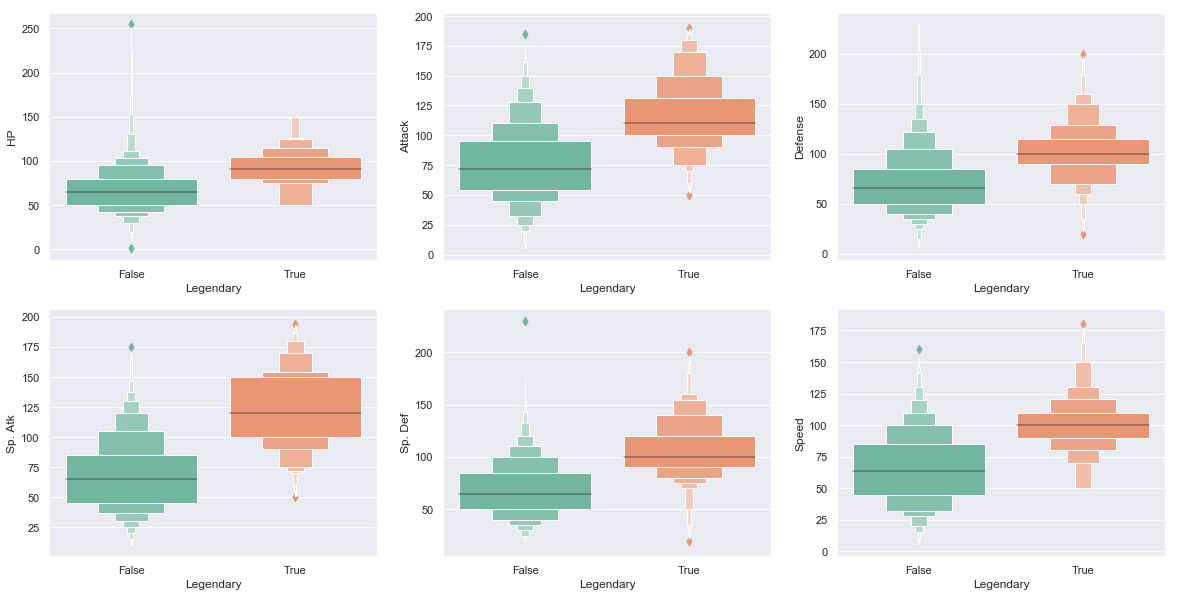

In [9]:
# Setting up subplots
fig, ax = plt.subplots(2,3, figsize = (20,10))

# Plotting 
v_plot = sns.boxenplot(x = 'Legendary', y = "HP", data = poke_data, palette = "Set2", ax = ax[0][0])
v_plot = sns.boxenplot(x = 'Legendary', y = "Attack", data = poke_data, palette = "Set2", ax = ax[0][1])
v_plot = sns.boxenplot(x = 'Legendary', y = "Defense", data = poke_data, palette = "Set2", ax = ax[0][2])
v_plot = sns.boxenplot(x = 'Legendary', y = "Sp. Atk", data = poke_data, palette = "Set2", ax = ax[1][0])
v_plot = sns.boxenplot(x = 'Legendary', y = "Sp. Def", data = poke_data, palette = "Set2", ax = ax[1][1])
v_plot = sns.boxenplot(x = 'Legendary', y = "Speed", data = poke_data, palette = "Set2", ax = ax[1][2])

Seems that there is a distinct difference in each of the attributes for legendary pokemon so we might be able to make a predictor for legendary pokemon

### Formatting Data

In [86]:
features = useful_data.drop(['Name', 'Type 1', 'Type 2'],1) # Don't need these columns

targets = []
[targets.append(1) if x == True else targets.append(0) for x in poke_data["Legendary"]]

print(features.shape)
print(len(targets))

# Using the Train-Test-Split Model
from sklearn.cross_validation import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = 0.4)

(800, 6)
800


### Using K-Nearest-Neighbor (KNN) Model

In [89]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Training model
knn.fit(features_train, targets_train)

# Testing model
knn.score(features_test, targets_test)


0.95

#### Looking for best k-value

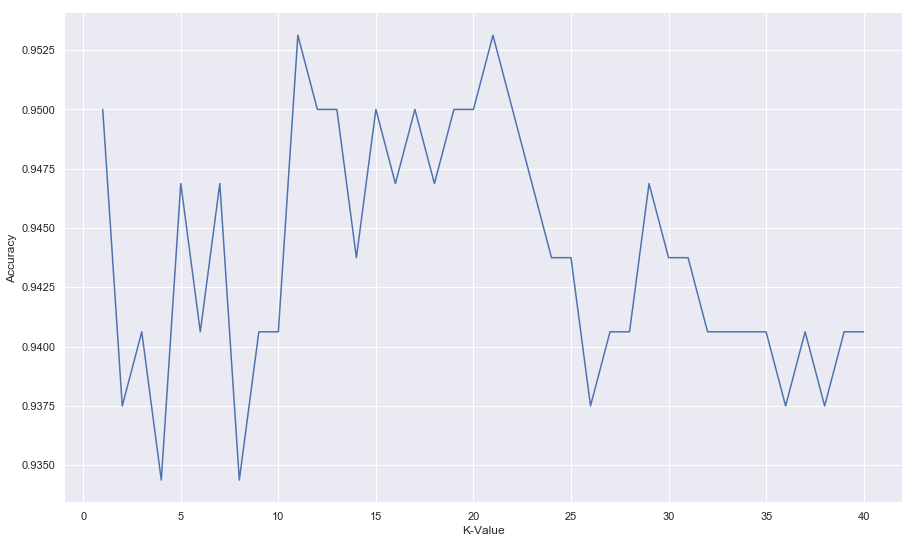

In [98]:
k_scores = []
k_range = range(1,41)
for x in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(features_train, targets_train)
    k_scores.append(knn.score(features_test, targets_test))

d = {"K-Value": k_range, "Accuracy": k_scores}
df = pd.DataFrame(data = d)

setplt()
check_k = sns.lineplot(x = "K-Value", y = "Accuracy", data = df)

In [121]:
# Using k = 21
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(features_train, targets_train)
knn.score(features_test, targets_test)

0.953125

#### Testing whole set

In [122]:
knn.score(features, targets)

0.95

### Using Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) # number of trees = 100
rfc.fit(features_train, targets_train)
rfc.score(features_test, targets_test)

0.95625

#### Testing whole set

In [118]:
rfc.score(features,targets)

0.98

Hey that's pretty good! We can now use this Random Forest ML model to predict whether pokemon is legenday with a 98% accuracy